In [1]:
import investpy

In [2]:
investpy.__author__

'Alvaro Bartolome <alvarob96@usal.es>'

In [3]:
investpy.__version__

'0.8.8'

In [120]:
df = investpy.get_historical_data('bbva', '01/01/2018', '01/01/2019')

In [52]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2018-01-02,7.082,7.169,7.050,7.139,15960000
2018-01-03,7.094,7.120,7.055,7.113,13320000
2018-01-04,7.221,7.274,7.104,7.113,20790000
2018-01-05,7.253,7.282,7.203,7.259,13580000
2018-01-08,7.235,7.293,7.220,7.274,13420000


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

sns.set(style='darkgrid')

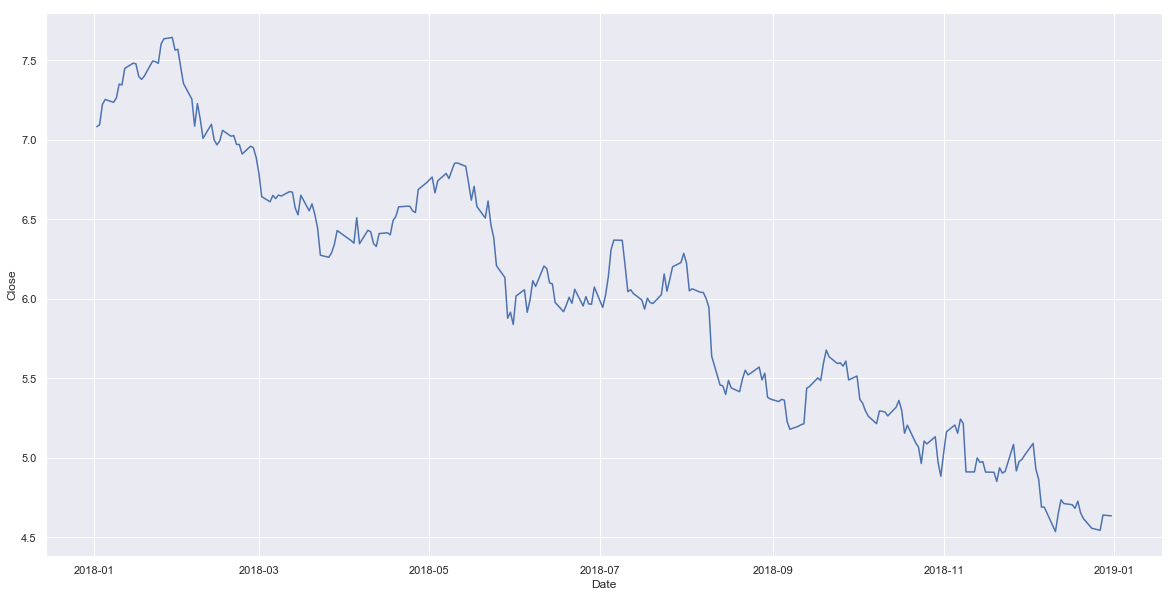

In [54]:
plt.figure(figsize=(20, 10))

sns.lineplot(x=df.index, y=df['Close'])

In [55]:
df.loc[:, 'Close'].mean()

6.016145098039217

In [56]:
df.loc[:, 'Close'].std()

0.8143048038107972

In [57]:
df.describe()

,Close,High,Low,Open,Volume
count,255.000000,255.000000,255.000000,255.000000,2.550000e+02
mean,6.016145,6.083251,5.963275,6.030561,2.007090e+07
std,0.814305,0.811813,0.813549,0.813375,8.688568e+06
min,4.537000,4.599000,4.476000,4.520000,5.460000e+06
25%,5.308500,5.396500,5.270000,5.346500,1.441500e+07
50%,6.041000,6.087000,5.998000,6.050000,1.826000e+07
75%,6.625000,6.698500,6.564500,6.637500,2.304500e+07
max,7.643000,7.730000,7.594000,7.680000,6.648000e+07


<ErrorbarContainer object of 3 artists>

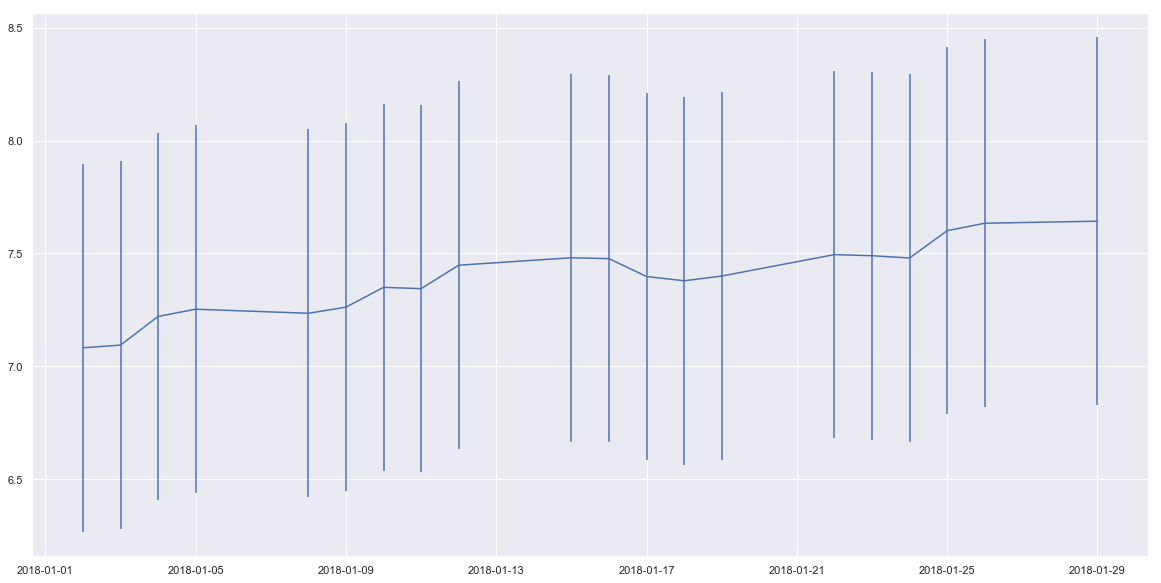

In [59]:
plt.figure(figsize=(20, 10))

plt.errorbar(df.index[:20], df[:20]['Close'], df.loc[:, 'Close'].std())

In [100]:
df.index

DatetimeIndex(['2018-01-02', '2018-01-03', '2018-01-04', '2018-01-05',
               '2018-01-08', '2018-01-09', '2018-01-10', '2018-01-11',
               '2018-01-12', '2018-01-15',
               ...
               '2018-12-14', '2018-12-17', '2018-12-18', '2018-12-19',
               '2018-12-20', '2018-12-21', '2018-12-24', '2018-12-27',
               '2018-12-28', '2018-12-31'],
              dtype='datetime64[ns]', name='Date', length=255, freq=None)

In [119]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,


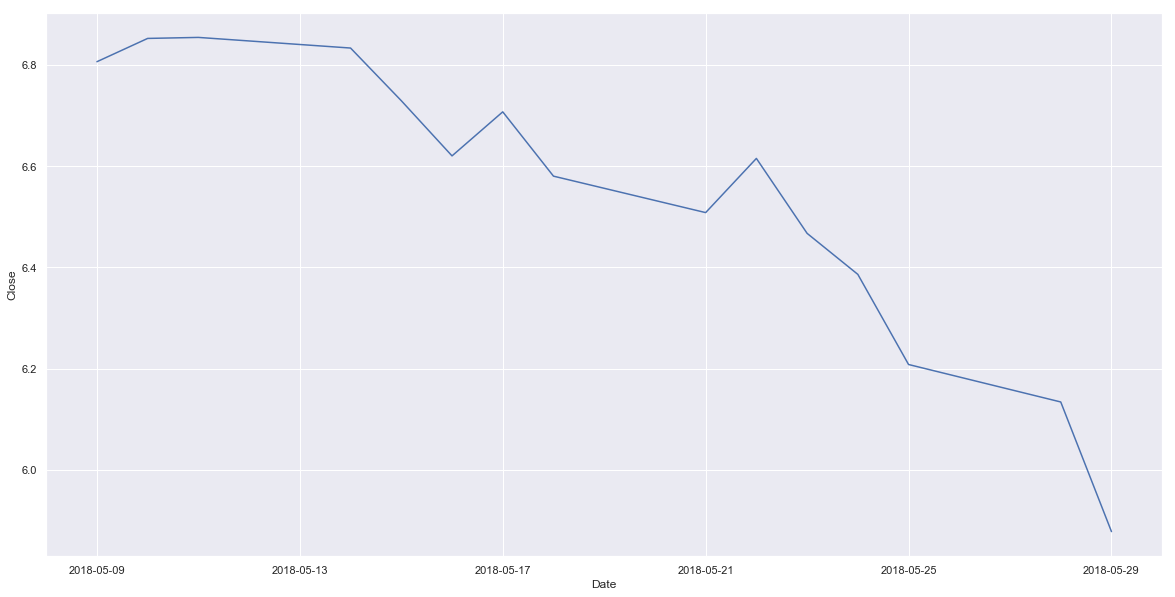

In [137]:
plt.figure(figsize=(20, 10))

sns.lineplot(x=df['2018-05-09':'2018-05-29'].index, y=df['2018-05-09':'2018-05-29']['Close'])

In [139]:
df['2018-05-09':'2018-05-29']

,Close,High,Low,Open,Volume
Date,,,,,
2018-05-09,6.806,6.810,6.735,6.768,10880000
2018-05-10,6.852,6.852,6.789,6.820,11120000
2018-05-11,6.854,6.885,6.838,6.852,9560000
2018-05-14,6.833,6.886,6.796,6.845,9130000
2018-05-15,6.729,6.855,6.669,6.828,17990000
2018-05-16,6.620,6.743,6.558,6.708,22780000
2018-05-17,6.707,6.708,6.610,6.640,15460000
2018-05-18,6.580,6.706,6.546,6.700,30180000
2018-05-21,6.508,6.623,6.489,6.610,12760000


In [4]:
for index, row in df.iterrows():
    print(index)

NameError: name 'df' is not defined

In [5]:
import twipper

In [6]:
twipper.__author__

'Alvaro Bartolome @ alvarob96 on GitHub'

In [7]:
twipper.__version__

'0.0.8'

In [8]:
from twipper.credentials import Twipper

In [20]:
auth = Twipper(consumer_key='wmZLM8c1YhBM4PHK4EPLt6frq',
               consumer_secret='8qigTQcxJOLf2cPghlEUAkFk2UDOvghHg9BHv0xZNDdzYevfQQ',
               access_token='126261898-SLhjM2TJ1ObV5SQ2GhSIxz1QAW3fNgatqL4fdMIc',
               access_token_secret='pi9B0OMNSiW3TyqXLL5Vwaz6hvIiuzAI6WHTOjTGyDr7L')

In [21]:
api = auth.get_api()

In [23]:
auth.oauth_token

'AAAAAAAAAAAAAAAAAAAAAL%2Fp9QAAAAAAw3EVZJehvdBauGiZ0w9K4QtO8So%3DWqmPLAwSrTPODG9991WamAyekuhDUgGRdxu2Y8fRrzRlpPXFni'

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
import copy

In [8]:
aux = copy.deepcopy(df)

In [9]:
aux.columns

Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

In [10]:
aux = aux.drop(columns=['Volume'])

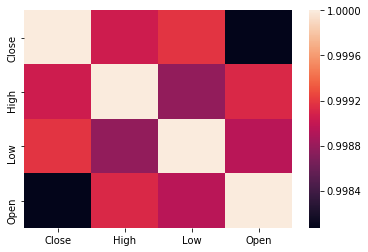

In [11]:
sns.heatmap(aux.corr())

In [12]:
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor

In [13]:
X = [[value] for value in df['Open'].values]
y = df['Close'].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=False)

In [14]:
mlp_close = MLPRegressor(activation='relu', hidden_layer_sizes=13, learning_rate='constant', shuffle=False, solver='lbfgs')
mlp_close.fit(X_train, y_train)

prediction = mlp_close.predict(X_test)

print(mlp_close.score(X_test, y_test))

0.9566809046137186


In [15]:
X = [[value] for value in df['Close'].values]
y = df['Open'].values.tolist()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1, shuffle=False)

In [16]:
mlp_open = MLPRegressor(activation='relu', hidden_layer_sizes=13, learning_rate='constant', shuffle=False, solver='lbfgs')
mlp_open.fit(X_train, y_train)

prediction = mlp_open.predict(X_test)

print(mlp_open.score(X_test, y_test))

0.9562573901924863


In [17]:
prediction

array([20.57078868, 20.17543011, 20.26050727, 20.18043465, 20.11537564,
       19.94021678, 19.92520316, 19.94021678, 19.63994444, 19.86514869,
       19.86514869, 19.85013508, 19.87515777, 19.94021678, 20.08534841,
       19.97524855, 19.84513054, 19.70500345, 19.7500443 , 20.44567521,
       20.28552996, 19.86514869, 20.01528486, 20.23048003, 20.19544826,
       20.3806162 , 20.60081592, 20.47570244, 20.58079776, 20.52074329,
       20.50572968, 20.20545734, 20.61082499, 20.63084315, 20.82602017,
       20.88607463, 20.64085223, 20.68088854, 20.59080684, 20.62083407,
       20.56578414, 20.44567521, 20.40063436, 20.51073421, 20.26551181,
       20.27051635, 20.28052542, 20.21046188, 20.7659657 , 20.76096116,
       20.75095208, 20.57579322, 20.81100655, 20.73093393, 20.49071606,
       20.0202894 , 20.12538472, 20.01028032, 20.16041649, 19.89517593,
       19.59490359, 19.30464033, 19.4547765 , 19.29963579, 19.22957225,
       19.01437707, 19.07943608, 18.69909112, 18.74413197, 18.25